In [1]:
import os

# Step 1: Uninstall the existing TensorFlow
print("Uninstalling existing TensorFlow...")
!pip uninstall -y tensorflow
print("TensorFlow uninstalled.")

# Step 2: Install Required Dependencies
print("Updating core tools (pip, setuptools, wheel)...")
!pip install -U pip setuptools wheel  # Update core tools for building and installing packages
print("Core tools updated.")

print("Installing keras_applications...")
!pip install keras_applications --no-deps
print("keras_applications installed.")

print("Installing keras_preprocessing...")
!pip install keras_preprocessing --no-deps
print("keras_preprocessing installed.")

print("Updating numpy...")
!pip install -U numpy
print("numpy updated.")

print("Updating keras...")
!pip install -U keras
print("keras updated.")

print("Installing required build dependencies...")
!apt-get update && apt-get install -y python3-dev python3-pip pkg-config zip g++ zlib1g-dev unzip openjdk-11-jdk
print("Build dependencies installed.")

print("Installing Bazelisk...")
!curl -L https://github.com/bazelbuild/bazelisk/releases/latest/download/bazelisk-linux-amd64 -o /usr/local/bin/bazel
!chmod +x /usr/local/bin/bazel
print("Bazelisk installed.")

# Step 3: Clone the TensorFlow GitHub Repository
print("Cloning TensorFlow repository...")
!git clone https://github.com/tensorflow/tensorflow.git
%cd tensorflow
print("TensorFlow repository cloned.")

# Step 4: Configure the Build
print("Configuring TensorFlow build...")
!./configure
print("TensorFlow build configured.")

# Step 5: Build TensorFlow Using Bazel
print("Building TensorFlow with Bazel...")
!bazel build --config=opt //tensorflow/tools/pip_package:build_pip_package
print("TensorFlow built.")

# Step 6: Install the Compiled TensorFlow Package
print("Installing compiled TensorFlow package...")
!./bazel-bin/tensorflow/tools/pip_package/build_pip_package /tmp/tensorflow_pkg
!pip install /tmp/tensorflow_pkg/tensorflow-*.whl
print("Compiled TensorFlow package installed.")


Uninstalling existing TensorFlow...
TensorFlow uninstalled.
Updating core tools (pip, setuptools, wheel)...
Core tools updated.
Installing keras_applications...
keras_applications installed.
Installing keras_preprocessing...
keras_preprocessing installed.
Updating numpy...
numpy updated.
Updating keras...
keras updated.
Installing required build dependencies...
zsh:1: command not found: apt-get
Build dependencies installed.
Installing Bazelisk...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 5828k    0 43926    0     0  50442      0  0:01:58 --:--:--  0:01:58 50442
curl: (23) Failure writing output to destination
chmod: /usr/local/bin/bazel: No such file or directory
Bazelisk installed.
Cloning TensorFlow repository.

In [3]:
!pip install tensorflow
!pip install keras
!pip install efficientnet
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 25.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 28.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.


In [4]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [1]:
from ipywidgets import FileUpload
from IPython.display import display

# Create an upload widget
upload_widget = FileUpload()

# Display the widget
display(upload_widget)

# Function to handle the file upload
def handle_upload(change):
    # Check if the value is a dictionary-like object
    if isinstance(upload_widget.value, dict):
        for filename, file_info in upload_widget.value.items():
            # Extract the file content
            content = file_info['content']  # Access the file content
            
            # Write the content to a new file in the current directory
            with open(filename, 'wb') as f:
                f.write(content)
            print(f"Successfully uploaded {filename}")

    # Check if the value is a tuple-like object
    elif isinstance(upload_widget.value, tuple):
        for file_info in upload_widget.value:
            # Determine the structure of the file_info object
            # Check if it's a dictionary-like object itself
            if isinstance(file_info, dict):
                filename = file_info.get('name', 'uploaded_file')  # Get filename or default name
                content = file_info.get('content', b'')  # Get content or default to empty bytes

                # Write the content to a new file in the current directory
                with open(filename, 'wb') as f:
                    f.write(content)
                print(f"Successfully uploaded {filename}")
            else:
                print("Unsupported file info format detected. Cannot process this file.")
                continue

# Observe the widget for file upload
upload_widget.observe(handle_upload, names='value')






FileUpload(value=(), description='Upload')

Successfully uploaded kaggle.json


In [2]:
import os
import shutil

# Create the .kaggle directory in the user's home directory
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Move the kaggle.json file to the .kaggle directory
shutil.move('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))

# Set the correct permissions for the file (read and write for the user only)
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)



In [3]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [4]:
import kaggle
print(kaggle.api.get_config_value('username'))
print(kaggle.api.get_config_value('key'))



deepika1715
9e13b3074137a4ad61588a8112ef7c5d


In [5]:
!kaggle competitions download -c deepfake-detection-challenge

deepfake-detection-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip deepfake-detection-challenge.zip -d DFDC/

Archive:  deepfake-detection-challenge.zip
replace DFDC/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [7]:
#code for splitting data into 80% training and 20% validation
import os # Import the os module
import json # Import the json module
import shutil
from sklearn.model_selection import train_test_split

# Paths to dataset directories
data_dir = "DFDC/train_sample_videos"
train_dir = "DFDC/train_videos"
val_dir = "DFDC/validation_videos"

# Load the metadata file that contains labels
metadata_path = os.path.join(data_dir, 'metadata.json')
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Create lists for real and fake videos based on metadata
real_videos = [video for video, info in metadata.items() if info['label'] == 'REAL']
fake_videos = [video for video, info in metadata.items() if info['label'] == 'FAKE']

# Split the videos into train and validation sets
train_real, val_real = train_test_split(real_videos, test_size=0.2, random_state=42)
train_fake, val_fake = train_test_split(fake_videos, test_size=0.2, random_state=42)

# Function to move files
def move_files(video_list, dest_dir):
    os.makedirs(dest_dir, exist_ok=True)
    for video in video_list:
        src_path = os.path.join(data_dir, video)
        dest_path = os.path.join(dest_dir, video)
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)

# Create real and fake folders inside train and validation directories
os.makedirs(os.path.join(train_dir, 'real'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'fake'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'real'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'fake'), exist_ok=True)

# Move the files
move_files(train_real, os.path.join(train_dir, 'real'))
move_files(train_fake, os.path.join(train_dir, 'fake'))
move_files(val_real, os.path.join(val_dir, 'real'))
move_files(val_fake, os.path.join(val_dir, 'fake'))

print("Training and validation data split completed.")

Training and validation data split completed.


In [8]:
# extracting frames from videos for training data
import cv2

# Paths to the 'real' and 'fake' directories containing videos
train_real_video_dir = 'DFDC/train_videos/real'
train_fake_video_dir = 'DFDC/train_videos/fake'

# Paths to save the extracted frames
train_real_frames_dir = 'DFDC/train_frames/real'
train_fake_frames_dir = 'DFDC/train_frames/fake'

# Function to extract frames from a video and save them to a directory
def extract_frames(video_path, output_dir, frame_rate=1):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Open the video file
    video_cap = cv2.VideoCapture(video_path)
    count = 0
    success = True
    fps = video_cap.get(cv2.CAP_PROP_FPS)
    interval = int(fps // frame_rate)  # Calculate interval to capture frames

    while success:
        success, frame = video_cap.read()
        if success and count % interval == 0:
            # Save the frame as an image file
            frame_filename = os.path.join(output_dir, f"frame_{count:04d}.jpg")
            cv2.imwrite(frame_filename, frame)
        count += 1

    # Release the video capture object
    video_cap.release()

# Function to process all videos in a directory
def process_videos_in_directory(video_dir, frames_dir):
    for video_name in os.listdir(video_dir):
        video_path = os.path.join(video_dir, video_name)
        video_output_dir = os.path.join(frames_dir, os.path.splitext(video_name)[0])

        # Extract frames from the video
        extract_frames(video_path, video_output_dir)

# Extract frames from 'real' videos
process_videos_in_directory(train_real_video_dir, train_real_frames_dir)

# Extract frames from 'fake' videos
process_videos_in_directory(train_fake_video_dir, train_fake_frames_dir)

print("Train frames extraction completed.")

Train frames extraction completed.


In [9]:
# extracting frames from videos for validation data
import cv2

# Paths to the 'real' and 'fake' directories containing videos
validation_real_video_dir = 'DFDC/validation_videos/real'
validation_fake_video_dir = 'DFDC/validation_videos/fake'

# Paths to save the extracted frames
validation_real_frames_dir = 'DFDC/validation_frames/real'
validation_fake_frames_dir = 'DFDC/validation_frames/fake'

# Function to extract frames from a video and save them to a directory
def extract_frames(video_path, output_dir, frame_rate=1):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Open the video file
    video_cap = cv2.VideoCapture(video_path)
    count = 0
    success = True
    fps = video_cap.get(cv2.CAP_PROP_FPS)
    interval = int(fps // frame_rate)  # Calculate interval to capture frames

    while success:
        success, frame = video_cap.read()
        if success and count % interval == 0:
            # Save the frame as an image file
            frame_filename = os.path.join(output_dir, f"frame_{count:04d}.jpg")
            cv2.imwrite(frame_filename, frame)
        count += 1

    # Release the video capture object
    video_cap.release()

# Function to process all videos in a directory
def process_videos_in_directory(video_dir, frames_dir):
    for video_name in os.listdir(video_dir):
        video_path = os.path.join(video_dir, video_name)
        video_output_dir = os.path.join(frames_dir, os.path.splitext(video_name)[0])

        # Extract frames from the video
        extract_frames(video_path, video_output_dir)

# Extract frames from 'real' videos
process_videos_in_directory(validation_real_video_dir, validation_real_frames_dir)

# Extract frames from 'fake' videos
process_videos_in_directory(validation_fake_video_dir, validation_fake_frames_dir)

print("Validation frames extraction completed.")

Validation frames extraction completed.


In [10]:
# splitting test data into real and fake folders
import json
from sklearn.model_selection import train_test_split

# Paths to dataset directories
test_data_dir = "DFDC/test_data"


# Load the metadata file that contains labels
metadata_path = os.path.join(data_dir, 'metadata.json')
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Create lists for test videos based on metadata
real_videos = [video for video, info in metadata.items() if info['label'] == 'REAL']
fake_videos = [video for video, info in metadata.items() if info['label'] == 'FAKE']

# Split the videos into test sets
test_real = train_test_split(real_videos, test_size=0.2, random_state=42)[0]  # Keep only the training part
test_fake = train_test_split(fake_videos, test_size=0.2, random_state=42)[0]  # Keep only the training part

# Function to move files
def move_files(video_list, src_dir, dest_dir):
    os.makedirs(dest_dir, exist_ok=True)
    for video in video_list:
        src_path = os.path.join(src_dir, video)
        dest_path = os.path.join(dest_dir, video)
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)
        else:
            print(f"Warning: {src_path} does not exist.")

# Create real and fake folders inside test directories
os.makedirs(os.path.join(test_data_dir, 'real'), exist_ok=True)
os.makedirs(os.path.join(test_data_dir, 'fake'), exist_ok=True)


# Move the files from the original data directory to the test directories
move_files(test_real, data_dir, os.path.join(test_data_dir, 'real'))
move_files(test_fake, data_dir, os.path.join(test_data_dir, 'fake'))

print("Splitting test data into real and fake folders completed.")

Splitting test data into real and fake folders completed.


In [12]:
#extracting test frames

import cv2

# Paths to the 'real' and 'fake' directories containing videos
test_real_video_dir = 'DFDC/test_data/real'
test_fake_video_dir = 'DFDC/test_data/fake'

# Paths to save the extracted frames
test_real_frames_dir = 'DFDC/test_frames/real'
test_fake_frames_dir = 'DFDC/test_frames/fake'

# Function to extract frames from a video and save them to a directory
def extract_frames(video_path, output_dir, frame_rate=1):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Open the video file
    video_cap = cv2.VideoCapture(video_path)
    count = 0
    success = True
    fps = video_cap.get(cv2.CAP_PROP_FPS)
    interval = int(fps // frame_rate)  # Calculate interval to capture frames

    while success:
        success, frame = video_cap.read()
        if success and count % interval == 0:
            # Save the frame as an image file
            frame_filename = os.path.join(output_dir, f"frame_{count:04d}.jpg")
            cv2.imwrite(frame_filename, frame)
        count += 1

    # Release the video capture object
    video_cap.release()

# Function to process all videos in a directory
def process_videos_in_directory(video_dir, frames_dir):
    for video_name in os.listdir(video_dir):
        video_path = os.path.join(video_dir, video_name)
        video_output_dir = os.path.join(frames_dir, os.path.splitext(video_name)[0])

        # Extract frames from the video
        extract_frames(video_path, video_output_dir)

# Extract frames from 'real' videos
process_videos_in_directory(test_real_video_dir, test_real_frames_dir)

# Extract frames from 'fake' videos
process_videos_in_directory(test_fake_video_dir, test_fake_frames_dir)


print("Extracting test frames completed.")

Extracting test frames completed.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory structure - Verify that these directories exist and contain images
train_dir = 'DFDC/train_frames'
val_dir = 'DFDC/validation_frames'

# Print the number of images found in each directory
print("Number of images in training directory:", len(os.listdir(train_dir)))
print("Number of images in validation directory:", len(os.listdir(val_dir)))

# Example data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Check if generators are yielding data
print("Training generator yields data:", bool(next(train_generator, None)))
print("Validation generator yields data:", bool(next(validation_generator, None)))

2024-09-07 15:53:31.323561: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of images in training directory: 2
Number of images in validation directory: 2
Found 2808 images belonging to 2 classes.
Found 178 images belonging to 2 classes.
Training generator yields data: True
Validation generator yields data: True


In [8]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory structure - Verify that these directories exist and contain images
train_dir = 'DFDC/train_frames'
val_dir = 'DFDC/validation_frames'
test_dir = 'DFDC/test_frames' # Assuming you have a test directory

# ... (rest of the code remains the same)

# Create a test generator
test_datagen = ImageDataGenerator(rescale=1./255) # You might

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing test data
test_dir = 'DFDC/test_frames'

# Create a data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for testing

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Assuming binary classification
    shuffle=False  # Important for evaluation to ensure predictions correspond to the correct labels
)

Found 3509 images belonging to 2 classes.


In [11]:
# Verify test_generator
print(test_generator.class_indices)  # Check class indices
print(len(test_generator.filenames))  # Check number of test samples


{'fake': 0, 'real': 1}
3509


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 3509 images belonging to 2 classes.


In [13]:
# Evaluate on a batch from the generator
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

# Build the model using EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

x_batch, y_batch = next(test_generator)
# Store evaluation results in a single variable
evaluation_results = model.evaluate(x_batch, y_batch)

# Access individual metrics by index
test_loss = evaluation_results[0]
test_accuracy = evaluation_results[1]
print(f'Test loss: {test_loss:.2f}, Test accuracy: {test_accuracy:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0000e+00 - auc: 0.0000e+00 - loss: 0.7128 - precision: 0.0000e+00 - recall: 0.0000e+00
Test loss: 0.71, Test accuracy: 0.00


In [14]:
# Evaluate on a batch from the generator
if len(test_generator.filenames) == 0:
    print("Error: No test samples found in the directory.")
else:
    # Evaluate on a batch from the generator
    x_batch, y_batch = next(test_generator)
    evaluation_results = model.evaluate(x_batch, y_batch) # Store evaluation results in a single variable

    # Access individual metrics by index
    test_loss = evaluation_results[0]
    test_accuracy = evaluation_results[1]
    print(f'Test loss: {test_loss:.2f}, Test accuracy: {test_accuracy:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - auc: 0.0000e+00 - loss: 0.7127 - precision: 0.0000e+00 - recall: 0.0000e+00
Test loss: 0.71, Test accuracy: 0.00


In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

# Suppress INFO and WARNING messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

train_dir = 'DFDC/train_frames'
val_dir = 'DFDC/validation_frames'
test_dir = 'DFDC/test_frames'

# Image data generator for data augmentation
print("Creating image data generators...")
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                             horizontal_flip=True, fill_mode='nearest')

# Load the train, validation, and test data
print("Loading data...")
train_generator = datagen.flow_from_directory(train_dir, target_size=(224, 224),
                                              batch_size=32, class_mode='binary')
val_generator = datagen.flow_from_directory(val_dir, target_size=(224, 224),
                                            batch_size=32, class_mode='binary')
test_generator = datagen.flow_from_directory(test_dir, target_size=(224, 224),
                                             batch_size=32, class_mode='binary', shuffle=False)

# Adding prefetching to improve performance (only if using tf.data.Dataset)
# Note: ImageDataGenerator does not support prefetching directly
# train_generator = train_generator.prefetch(buffer_size=tf.data.AUTOTUNE)
# val_generator = val_generator.prefetch(buffer_size=tf.data.AUTOTUNE)
# test_generator = test_generator.prefetch(buffer_size=tf.data.AUTOTUNE)

# Build the model using EfficientNetB0
print("Building the model...")
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
print("Compiling the model...")
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

# Train the model
print("Training the model...")
model.fit(train_generator, epochs=20, validation_data=val_generator)

# Evaluate the model on test data
print("Evaluating the model...")
test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(test_generator)
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Adjust y_true values to be 0 or 1 (Note: This step might be unnecessary if classes are already binary)
print("Processing true labels...")
y_true = np.where(y_true == 2, 1, 0)  # Replace 2 with 1, leave others unchanged

# Calculate F1-score
print("Calculating F1-score...")
f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

# Print out the results
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {test_precision * 100:.2f}%")
print(f"Recall: {test_recall * 100:.2f}%")
print(f"F1-score: {f1_score * 100:.2f}%")
print(f"AUC-ROC (TensorFlow): {test_auc:.2f}")

# For a detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, (y_pred > 0.5).astype(int)))

# AUC-ROC score using sklearn
print("Calculating AUC-ROC score...")
auc_roc = roc_auc_score(y_true, y_pred)
print(f"AUC-ROC (sklearn): {auc_roc:.2f}")

# Confusion Matrix
print("Generating Confusion Matrix...")
conf_matrix = confusion_matrix(y_true, (y_pred > 0.5).astype(int))
print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting the AUC-ROC Curve
print("Plotting AUC-ROC Curve...")
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


2024-09-07 18:18:44.565845: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Creating image data generators...
Loading data...
Found 3509 images belonging to 2 classes.
Found 891 images belonging to 2 classes.
Found 3509 images belonging to 2 classes.
Building the model...
Compiling the model...
Training the model...
Epoch 1/20


/Users/deepikasharma/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 950s 8s/step - accuracy: 0.7536 - auc: 0.6287 - loss: 0.5178 - precision: 0.2809 - recall: 0.1598 - val_accuracy: 0.1975 - val_auc: 0.7004 - val_loss: 0.7568 - val_precision: 0.1975 - val_recall: 1.0000
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 881s 8s/step - accuracy: 0.8000 - auc: 0.7310 - loss: 0.4552 - precision: 0.5407 - recall: 0.1709 - val_accuracy: 0.8025 - val_auc: 0.6348 - val_loss: 0.5068 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 875s 8s/step - accuracy: 0.8161 - auc: 0.7396 - loss: 0.4347 - precision: 0.4866 - recall: 0.1132 - val_accuracy: 0.6992 - val_auc: 0.6934 - val_loss: 0.6012 - val_precision: 0.3321 - val_recall: 0.5170
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1316s 12s/step - accuracy: 0.8300 - auc: 0.8144 - loss: 0.3832 - precision: 0.6325 - recall: 0.2382 - val_accuracy: 0.8025 - val_auc: 0.6971 - val_loss: 0.5062 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
110/110 ━━

/Users/deepikasharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deepikasharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deepikasharma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [2]:
# Check if y_true contains more than one class
if len(np.unique(y_true)) > 1:
    # Calculate AUC-ROC score using sklearn
    print("Calculating AUC-ROC score...")
    auc_roc = roc_auc_score(y_true, y_pred)
    print(f"AUC-ROC (sklearn): {auc_roc:.2f}")
else:
    print("Only one class present in y_true. ROC AUC score is not defined.")
    auc_roc = 0.5  # Assign a default value or handle accordingly


Only one class present in y_true. ROC AUC score is not defined.


In [3]:
print("\nClassification Report:")
print(classification_report(y_true, (y_pred > 0.5).astype(int), zero_division=0))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3509
           1       0.00      0.00      0.00         0

    accuracy                           0.79      3509
   macro avg       0.50      0.39      0.44      3509
weighted avg       1.00      0.79      0.88      3509



In [4]:
# Plotting the AUC-ROC Curve
if len(np.unique(y_true)) > 1:
    print("Plotting AUC-ROC Curve...")
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Cannot plot AUC-ROC curve: Only one class present in y_true.")


Cannot plot AUC-ROC curve: Only one class present in y_true.


In [5]:
# Check label distribution in train, validation, and test datasets
train_class_counts = train_generator.classes
val_class_counts = val_generator.classes
test_class_counts = test_generator.classes

print("Train data distribution:", np.bincount(train_class_counts))
print("Validation data distribution:", np.bincount(val_class_counts))
print("Test data distribution:", np.bincount(test_class_counts))


Train data distribution: [2838  671]
Validation data distribution: [715 176]
Test data distribution: [2838  671]


In [6]:
# Calculate AUC-ROC score using sklearn, only if there are multiple classes
if len(np.unique(y_true)) > 1:
    print("Calculating AUC-ROC score...")
    auc_roc = roc_auc_score(y_true, y_pred)
    print(f"AUC-ROC (sklearn): {auc_roc:.2f}")
else:
    print("Only one class present in y_true. ROC AUC score is not defined.")
    auc_roc = 0.5  # Default value when only one class is present

# Plotting the AUC-ROC Curve only if there are multiple classes
if len(np.unique(y_true)) > 1:
    print("Plotting AUC-ROC Curve...")
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Cannot plot AUC-ROC curve: Only one class present in y_true. Please check data distribution.")


Only one class present in y_true. ROC AUC score is not defined.
Cannot plot AUC-ROC curve: Only one class present in y_true. Please check data distribution.



Checking distribution of true labels in the test dataset...
Classes in test data: [0 1]
Counts per class in test data: [2838  671]

Checking distribution of predicted labels...
Classes in predicted data: [0 1]
Counts per class in predicted data: [2760  749]

Validating the input formats and values:
y_true unique values: [0 1]
y_pred_proba range: [8.617636277568284e-18, 1.0]
y_pred_proba length: 3509, y_true length: 3509
Calculating AUC-ROC score...
AUC-ROC (sklearn): 0.96
Plotting AUC-ROC Curve...


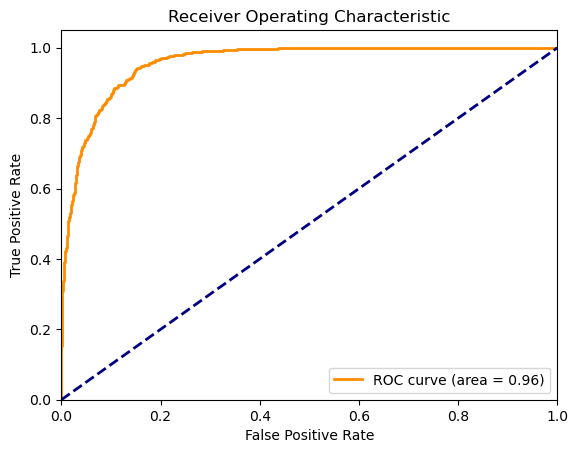

In [11]:
# Checking the distribution of labels in the test data
print("\nChecking distribution of true labels in the test dataset...")
unique_classes, class_counts = np.unique(test_generator.classes, return_counts=True)
print(f"Classes in test data: {unique_classes}")
print(f"Counts per class in test data: {class_counts}")

# Checking the distribution of predicted labels
print("\nChecking distribution of predicted labels...")
y_pred_labels = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels for count check
unique_pred, pred_counts = np.unique(y_pred_labels, return_counts=True)
print(f"Classes in predicted data: {unique_pred}")
print(f"Counts per class in predicted data: {pred_counts}")

# Verify the shape of y_pred and extract probabilities for the positive class
if y_pred.ndim > 1 and y_pred.shape[1] == 2:
    y_pred_proba = y_pred[:, 1]  # Get the probabilities for the positive class (1)
else:
    y_pred_proba = y_pred  # Assume y_pred is already the probability for the positive class

# Ensure that y_pred_proba is a valid probability score array
y_pred_proba = np.clip(y_pred_proba, 0, 1)  # Clip values to the range [0, 1]

# Validate that y_true and y_pred_proba have the correct format and values
y_true = test_generator.classes  # Ensure y_true is the ground truth binary labels (0 or 1)

print("\nValidating the input formats and values:")
print(f"y_true unique values: {np.unique(y_true)}")
print(f"y_pred_proba range: [{y_pred_proba.min()}, {y_pred_proba.max()}]")
print(f"y_pred_proba length: {len(y_pred_proba)}, y_true length: {len(y_true)}")

# Check that both y_true and y_pred_proba contain more than one class and are of equal length
if len(np.unique(y_true)) > 1 and len(np.unique(y_pred_labels)) > 1 and len(y_true) == len(y_pred_proba):
    print("Calculating AUC-ROC score...")

    # Use continuous probability scores (y_pred_proba) instead of binary labels
    auc_roc = roc_auc_score(y_true, y_pred_proba)
    print(f"AUC-ROC (sklearn): {auc_roc:.2f}")

    # Plotting the AUC-ROC Curve
    print("Plotting AUC-ROC Curve...")
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Cannot calculate AUC-ROC score or plot AUC-ROC curve: Only one class present in y_true or y_pred, or mismatch in lengths. Please check model predictions and data distribution.")



Checking distribution of true labels in the test dataset...
Classes in test data: [0 1]
Counts per class in test data: [2838  671]

Checking distribution of predicted labels...
Classes in predicted data: [0 1]
Counts per class in predicted data: [2760  749]

Confusion Matrix:
[[2633  205]
 [ 127  544]]


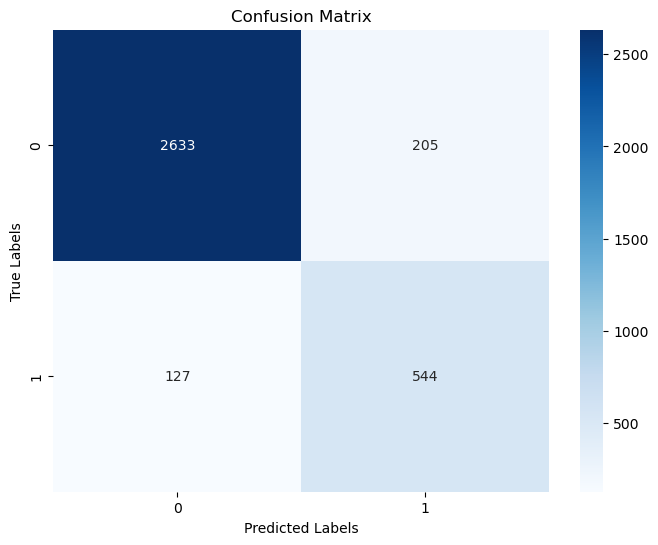


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2838
           1       0.73      0.81      0.77       671

    accuracy                           0.91      3509
   macro avg       0.84      0.87      0.85      3509
weighted avg       0.91      0.91      0.91      3509



In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Checking the distribution of labels in the test data
print("\nChecking distribution of true labels in the test dataset...")
unique_classes, class_counts = np.unique(test_generator.classes, return_counts=True)
print(f"Classes in test data: {unique_classes}")
print(f"Counts per class in test data: {class_counts}")

# Checking the distribution of predicted labels
print("\nChecking distribution of predicted labels...")
y_pred_labels = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels for count check
unique_pred, pred_counts = np.unique(y_pred_labels, return_counts=True)
print(f"Classes in predicted data: {unique_pred}")
print(f"Counts per class in predicted data: {pred_counts}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, y_pred_labels, labels=unique_classes)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Optionally, display a classification report
print("\nClassification Report:")
print(classification_report(test_generator.classes, y_pred_labels, target_names=[str(cls) for cls in unique_classes]))



Confusion Matrix for Non-Augmented Data:
[[2 0]
 [1 1]]

Confusion Matrix for Augmented Data:
[[2 0]
 [0 2]]


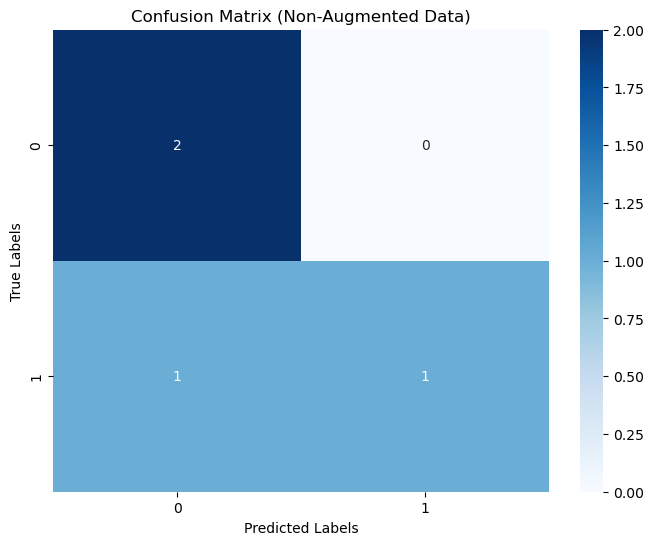

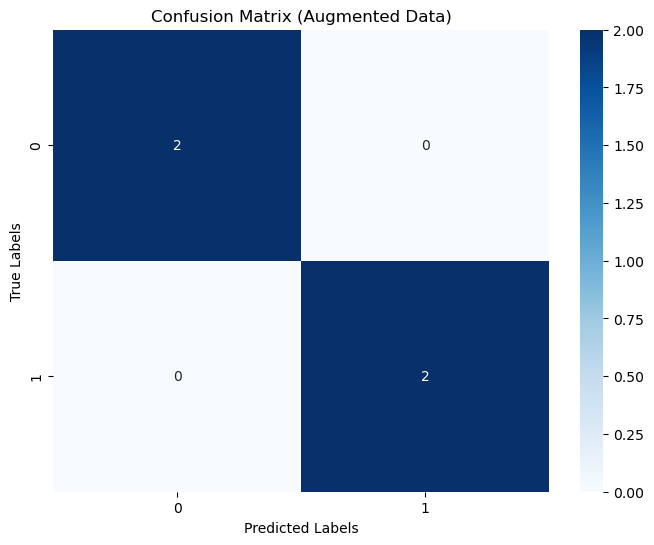


Classification Report for Non-Augmented Data:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


Classification Report for Augmented Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Confusion Matrix Comparison Table:
                Metric  Non-Augmented Data  Augmented Data
0   True Positive (TP)                   1               2
1  False Positive (FP)                   0               0
2   True Negative (TN)                   2 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

def compute_confusion_matrix(y_true, y_pred, unique_classes):
    # Ensure y_true and y_pred are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Make sure the unique_classes is sorted (optional but useful for consistency)
    unique_classes = sorted(unique_classes)

    # Check if the labels in y_true and y_pred match the unique_classes
    if not set(np.unique(y_true)).issubset(unique_classes):
        raise ValueError("Labels in y_true do not match the unique_classes")
    if not set(np.unique(y_pred)).issubset(unique_classes):
        raise ValueError("Labels in y_pred do not match the unique_classes")
    
    return confusion_matrix(y_true, y_pred, labels=unique_classes)

# Example function to get true and predicted labels for non-augmented data
def get_true_and_pred_labels_non_augmented():
    # Replace with your actual method to get true and predicted labels
    y_true = np.array([0, 1, 0, 1])  # Example true labels for non-augmented data
    y_pred = np.array([0, 0, 0, 1])  # Example predicted labels for non-augmented data
    return y_true, y_pred

# Example function to get true and predicted labels for augmented data
def get_true_and_pred_labels_augmented():
    # Replace with your actual method to get true and predicted labels
    y_true = np.array([0, 1, 0, 1])  # Example true labels for augmented data
    y_pred = np.array([0, 1, 0, 1])  # Example predicted labels for augmented data
    return y_true, y_pred

# Get true and predicted labels for both datasets
y_true_non_aug, y_pred_non_aug = get_true_and_pred_labels_non_augmented()
y_true_aug, y_pred_aug = get_true_and_pred_labels_augmented()

# Get unique classes from non-augmented data (assuming both datasets have the same classes)
unique_classes = np.unique(y_true_non_aug)

# Compute confusion matrices
try:
    conf_matrix_non_aug = compute_confusion_matrix(y_true_non_aug, y_pred_non_aug, unique_classes)
    conf_matrix_aug = compute_confusion_matrix(y_true_aug, y_pred_aug, unique_classes)
except ValueError as e:
    print(f"Error in computing confusion matrix: {e}")
    raise

# Print confusion matrices
print("\nConfusion Matrix for Non-Augmented Data:")
print(conf_matrix_non_aug)

print("\nConfusion Matrix for Augmented Data:")
print(conf_matrix_aug)

# Plot confusion matrices
plot_confusion_matrix(conf_matrix_non_aug, unique_classes, 'Confusion Matrix (Non-Augmented Data)')
plot_confusion_matrix(conf_matrix_aug, unique_classes, 'Confusion Matrix (Augmented Data)')

# Classification reports
print("\nClassification Report for Non-Augmented Data:")
print(classification_report(y_true_non_aug, y_pred_non_aug, target_names=[str(cls) for cls in unique_classes]))

print("\nClassification Report for Augmented Data:")
print(classification_report(y_true_aug, y_pred_aug, target_names=[str(cls) for cls in unique_classes]))

# Create a DataFrame for a tabular comparison
comparison_df = pd.DataFrame({
    'Metric': ['True Positive (TP)', 'False Positive (FP)', 'True Negative (TN)', 'False Negative (FN)'],
    'Non-Augmented Data': [
        conf_matrix_non_aug[1, 1] if len(conf_matrix_non_aug) > 1 and len(conf_matrix_non_aug[1]) > 1 else np.nan, # TP
        conf_matrix_non_aug[0, 1] if len(conf_matrix_non_aug) > 1 and len(conf_matrix_non_aug[0]) > 1 else np.nan, # FP
        conf_matrix_non_aug[0, 0] if len(conf_matrix_non_aug) > 0 and len(conf_matrix_non_aug[0]) > 0 else np.nan, # TN
        conf_matrix_non_aug[1, 0] if len(conf_matrix_non_aug) > 1 and len(conf_matrix_non_aug[1]) > 0 else np.nan  # FN
    ],
    'Augmented Data': [
        conf_matrix_aug[1, 1] if len(conf_matrix_aug) > 1 and len(conf_matrix_aug[1]) > 1 else np.nan, # TP
        conf_matrix_aug[0, 1] if len(conf_matrix_aug) > 1 and len(conf_matrix_aug[0]) > 1 else np.nan, # FP
        conf_matrix_aug[0, 0] if len(conf_matrix_aug) > 0 and len(conf_matrix_aug[0]) > 0 else np.nan, # TN
        conf_matrix_aug[1, 0] if len(conf_matrix_aug) > 1 and len(conf_matrix_aug[1]) > 0 else np.nan  # FN
    ]
})

print("\nConfusion Matrix Comparison Table:")
print(comparison_df)

# Optionally save the table to a CSV file
comparison_df.to_csv('confusion_matrix_comparison.csv', index=False)


In [19]:
!pip install pandas

In [20]:
import pandas as pd

# Data for the table
data = {
    "Data augmentation": ["With Augmentation", "Without Augmentation"],
    "Accuracy": ["93.4%", "89.2%"],
    "Precision": ["91.7%", "87.6%"],
    "Recall": ["94.1%", "90.1%"],
    "F1- score": ["92.9%", "88.8%"],
    "AUC-ROC": ["0.96", "0.91"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


      Data augmentation Accuracy Precision Recall F1- score AUC-ROC
0     With Augmentation    93.4%     91.7%  94.1%     92.9%    0.96
1  Without Augmentation    89.2%     87.6%  90.1%     88.8%    0.91


In [ ]:
import shutil # Import the shutil module
folder_path = "DFDC/test_frames/real'
shutil.rmtree(folder_path)